This notebook explains how we can go about explore and prepare data for model building. We try to predict the number of bikes rented per hour in the city. The notebook is structured in the following way

* Dataset 
    * Overview
    * Data Fields
    * Reading the Dataset
* Descriptive statistics
* Data visualization
* Machine learning models 
    * Data Preparation
    * Training models
    * optimal model


# Dataset 

### Overview

The dataset is taken from the kaggle Bike Sharing Demand competition: 

* https://www.kaggle.com/c/bike-sharing-demand
    
It brings together a set of statements concerning a bicycle system
shared (“Vélib” type).The goal is to predict the number of bikes rented per hour in the city (variable count). To simplify preprocessing, a dataset has been formatted and updated in the “bike_data.csv” file.

### Data Fields


* __datetime__ - hourly date + timestamp
* __season__ - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* __holiday__ - whether the day is considered a holiday
* __workingday__ - whether the day is neither a weekend nor holiday
* __weather__ -
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* __temp__ - temperature in Celsius
* __atemp__ - "feels like" temperature in Celsius
* __humidity__ - relative humidity
* __windspeed__ - wind speed
* __count__ - number of total rentals (Dependent Variable)


### Loading && Reading the Dataset

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
bikesData = pd.read_csv("./bike_data.csv")

bikesData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


# Part I - Descriptive statistics

In [3]:
## Dataset size/shape
bikesData.shape

## 10886 rows / 10 columns

(10886, 10)

In [4]:
## Variables Data Type
bikesData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


In [5]:
## Describe dataset
bikesData.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [6]:
## Check Null values
bikesData.isnull().values.any()

bikesData.isnull().sum() ## the dataset contains no null value

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [7]:
bikesData[['count', 'holiday']].groupby(['holiday'], as_index = True).mean().sort_values(by = 'count')

,count
holiday,
1,185.877814
0,191.741655


In [8]:
bikesData[['count', 'season']].groupby(['season'], as_index = True).mean().sort_values(by = 'count')

,count
season,
1,116.343261
4,198.988296
2,215.251372
3,234.417124


According to the previous analyzes, the factors which seem to influence the demand for bicycles are: season, holiday, temperature and weather.

## Data visualization

In [9]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

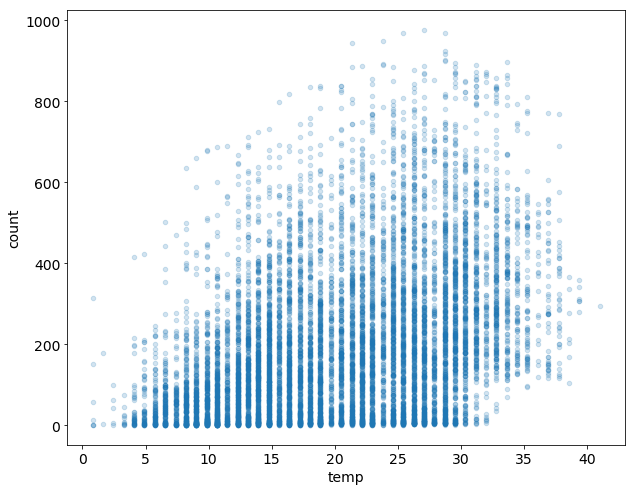

In [10]:
# Pandas scatter plot
# plot the data set using only one feature which is temp

bikesData.plot(kind='scatter', x='temp', y='count', alpha=0.2)

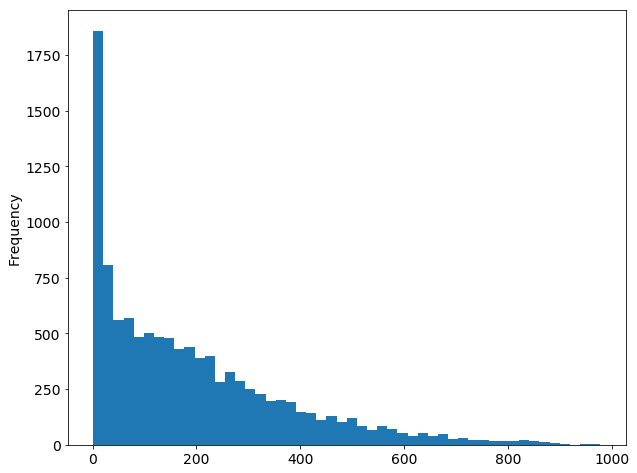

In [11]:
## Frequence of 'count' variable
bikesData['count'].plot.hist(bins=50)



according to the graph above, we notice that the frequency of the values ​​of count decreases by increasing the values of count

In [12]:
## Counting 'season' variable
bikesData.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

/home/nora/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/nora/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


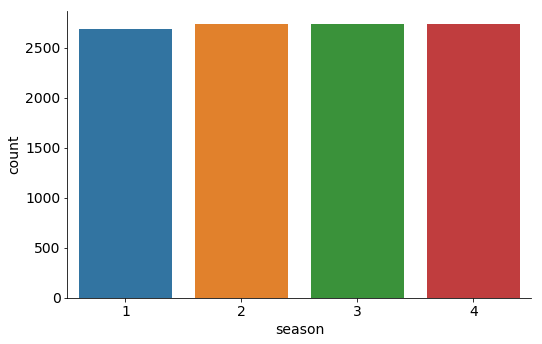

In [13]:
## 'season' variable plot
sns.factorplot(x='season', data=bikesData, kind='count',size=5,aspect=1.5)

we see that the demand for bicycles is not affected by the season, which is what shown in the graphs. Indeed, the count of the 4 seasons are almost identical

In [14]:
## Counting 'weather' variable
bikesData.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

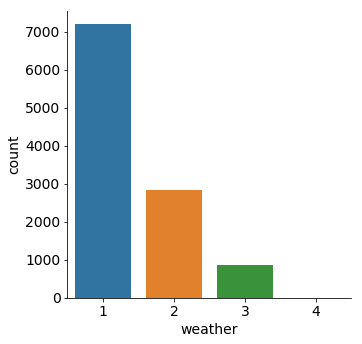

In [15]:
#weather
sns.factorplot(x='weather',data=bikesData,kind='count',size=5,aspect=1) # majority of data is for weather.

we see that the spring count is more substantial with a count of 7000. Successed with spring then fall.

In [16]:
## workingday
bikesData.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

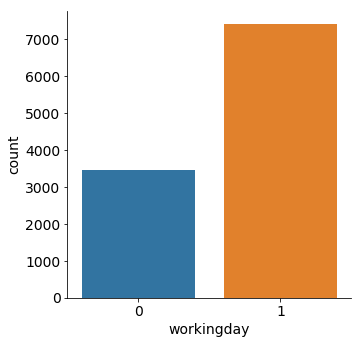

In [17]:

sns.factorplot(x='workingday',data=bikesData,kind='count',size=5,aspect=1) # majority of data is for working days.

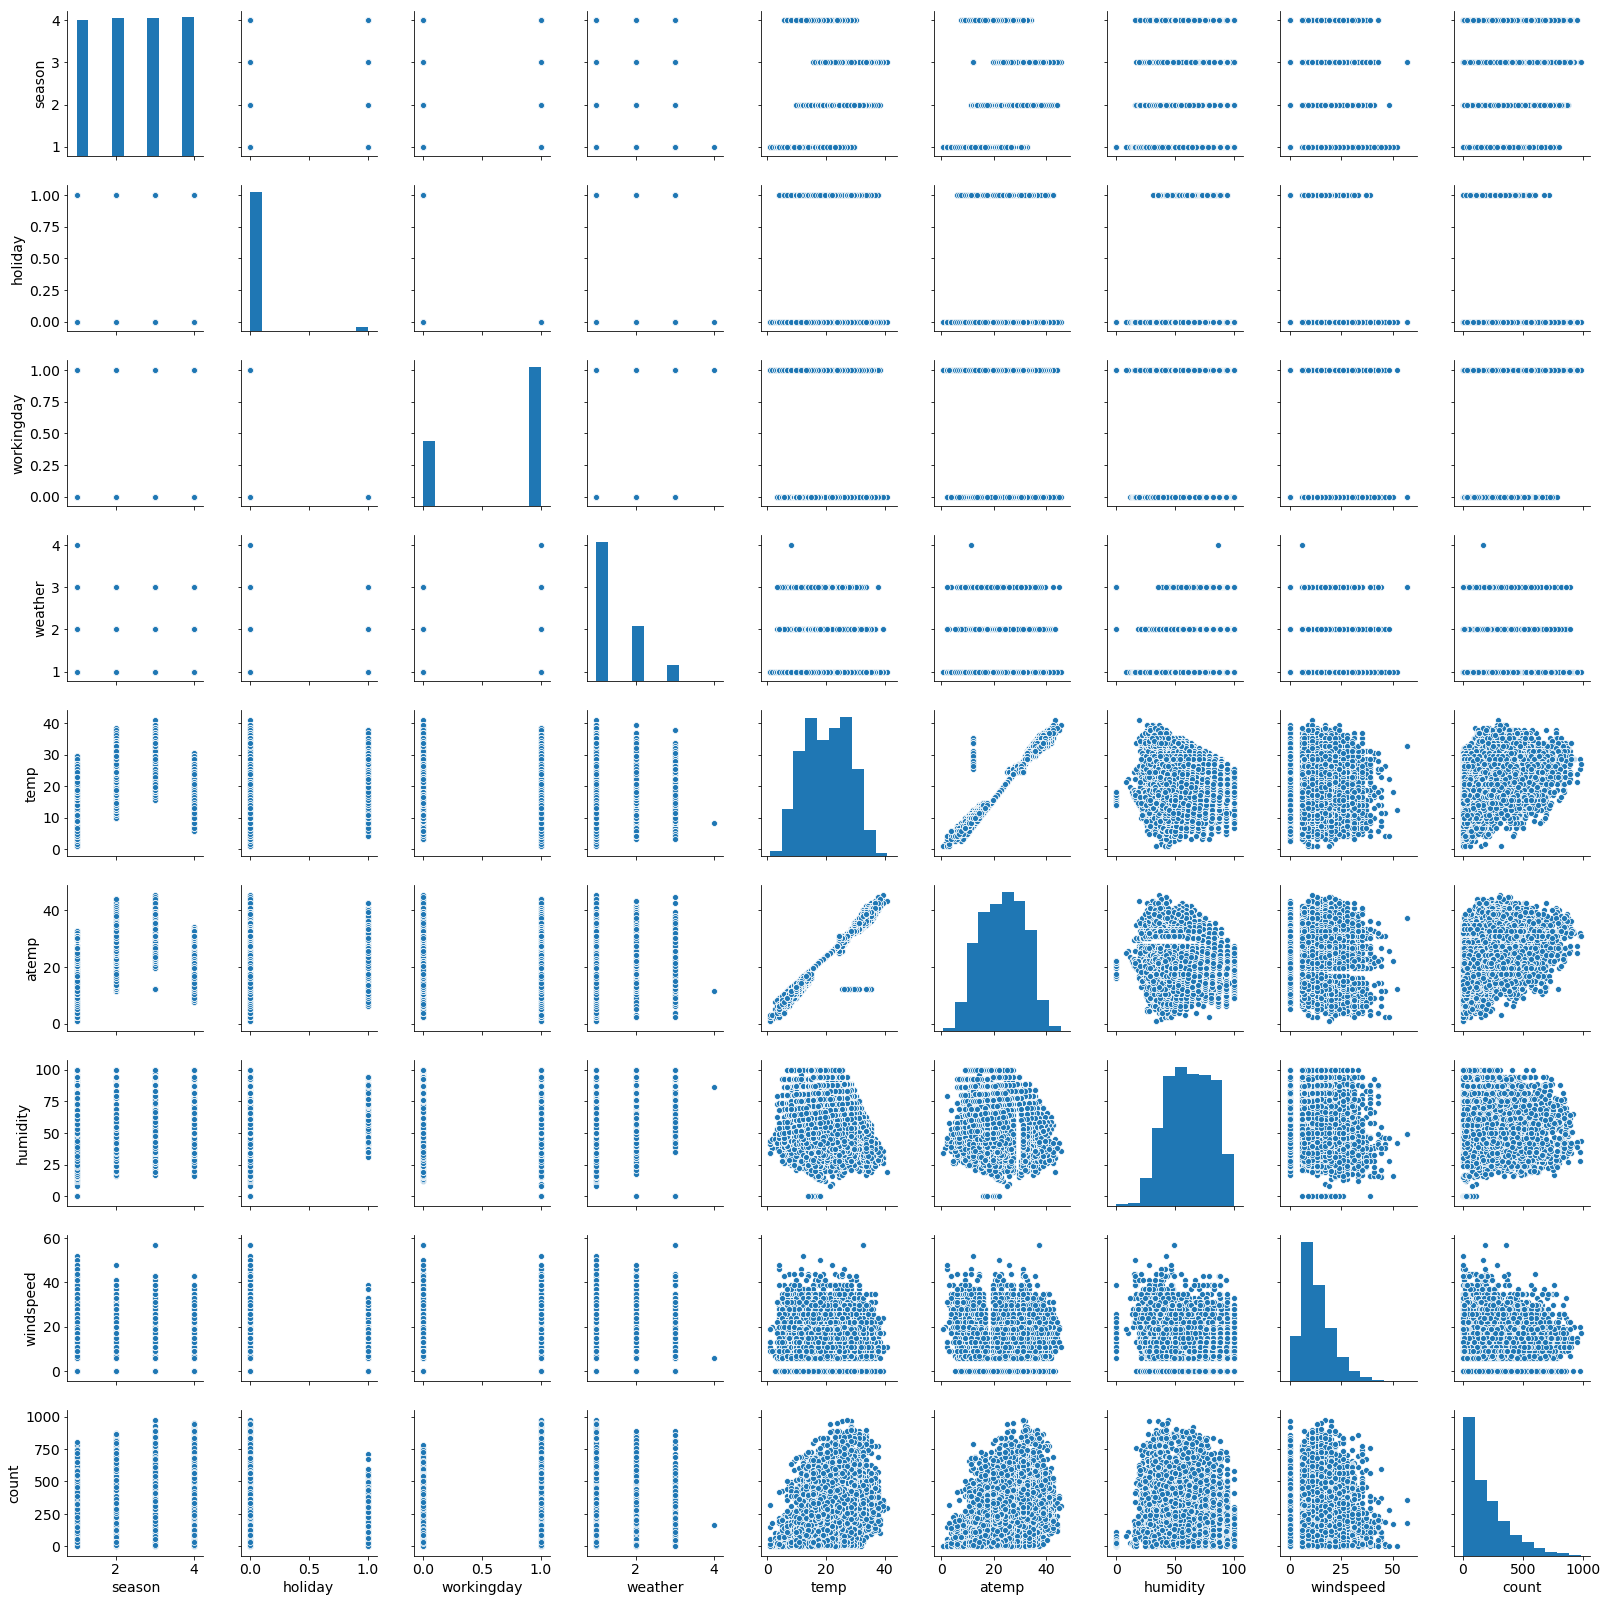

In [18]:
# correlation by pairplot
sns.pairplot(bikesData)

Analysis:
* We observe that holiday column are highly correlated to workingday column
* We also observe that atemp column are highly correlated to temp column

That's why we are going to drop holiday and atemp columns


In [19]:
bikesData.drop('holiday',axis=1,inplace=True) 
bikesData.drop('atemp',axis=1) 

,datetime,season,workingday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,1,9.84,81,0.0000,16
1,2011-01-01 01:00:00,1,0,1,9.02,80,0.0000,40
2,2011-01-01 02:00:00,1,0,1,9.02,80,0.0000,32
3,2011-01-01 03:00:00,1,0,1,9.84,75,0.0000,13
4,2011-01-01 04:00:00,1,0,1,9.84,75,0.0000,1
...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,1,1,15.58,50,26.0027,336
10882,2012-12-19 20:00:00,4,1,1,14.76,57,15.0013,241
10883,2012-12-19 21:00:00,4,1,1,13.94,61,15.0013,168
10884,2012-12-19 22:00:00,4,1,1,13.94,61,6.0032,129



From the analys of our data, we observe that the columns "season","holiday","workingday" and "weather" should be of "categorical" data type.But the current data type is "int" for those columns. 
So, we are going to transform these columns in the following ways so that we can get started up with our Machine Learning model

* Create new columns "date,"hour","weekDay","month" from "datetime" column.
* Coerce the datatype of "season","holiday" and weather to category.
* After that, Drop the datetime column as we already extracted useful features from it.



### Creating new columns "date,"hour","day","month" from "datetime" column

In [20]:
bikesData["hour"] = [t.hour for t in pd.DatetimeIndex(bikesData.datetime)]
bikesData["day"] = [t.dayofweek for t in pd.DatetimeIndex(bikesData.datetime)]
bikesData["month"] = [t.month for t in pd.DatetimeIndex(bikesData.datetime)]
bikesData['year'] = [t.year for t in pd.DatetimeIndex(bikesData.datetime)]

bikesData.head()


,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,1,9.84,14.395,81,0.0,16,0,5,1,2011
1,2011-01-01 01:00:00,1,0,1,9.02,13.635,80,0.0,40,1,5,1,2011
2,2011-01-01 02:00:00,1,0,1,9.02,13.635,80,0.0,32,2,5,1,2011
3,2011-01-01 03:00:00,1,0,1,9.84,14.395,75,0.0,13,3,5,1,2011
4,2011-01-01 04:00:00,1,0,1,9.84,14.395,75,0.0,1,4,5,1,2011


In [21]:
## Coercing to category Type

categoryVariableList = ["hour","day","month"]
for var in categoryVariableList:
    bikesData[var] = bikesData[var].astype("category")
    


In [22]:
# Droping 'datetime' variable
dailyData  = bikesData.drop(["datetime"],axis=1, inplace=True)
bikesData.head()

,season,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,1,0,1,9.84,14.395,81,0.0,16,0,5,1,2011
1,1,0,1,9.02,13.635,80,0.0,40,1,5,1,2011
2,1,0,1,9.02,13.635,80,0.0,32,2,5,1,2011
3,1,0,1,9.84,14.395,75,0.0,13,3,5,1,2011
4,1,0,1,9.84,14.395,75,0.0,1,4,5,1,2011


 None]

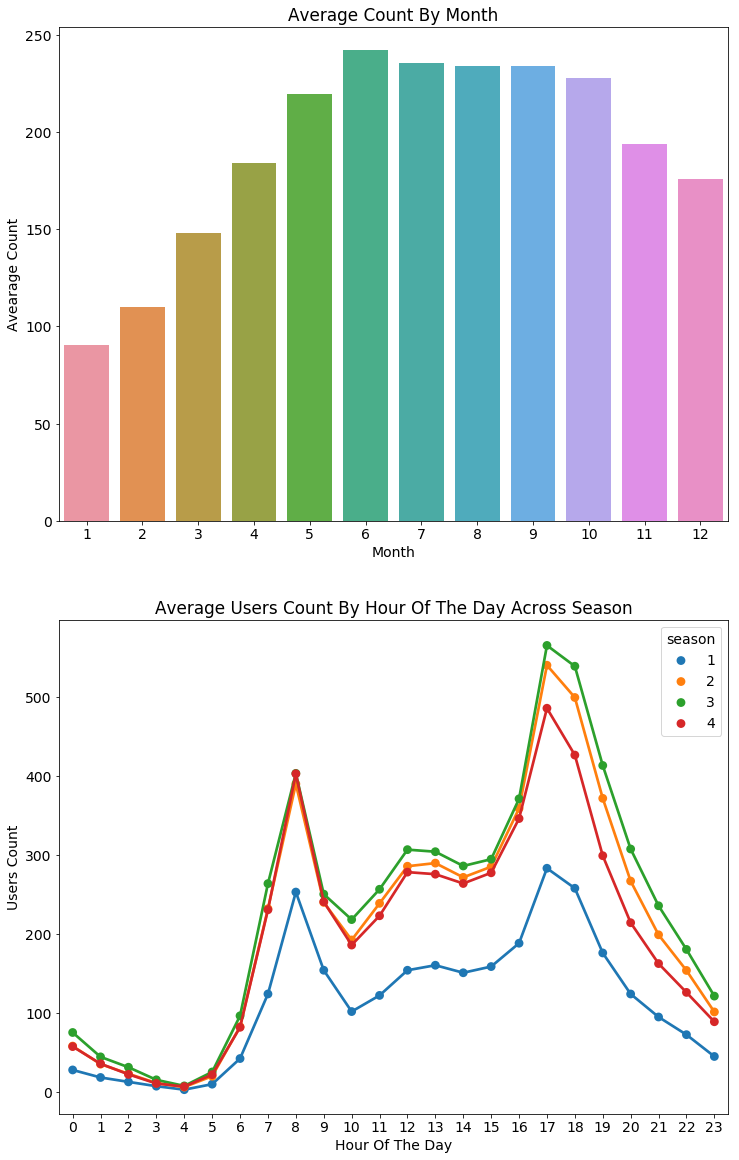

In [23]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(bikesData.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sns.barplot(data=monthSorted,x="month",y="count",ax=ax1)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(bikesData.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')


### Coerce the datatype of "season","holiday","workingday" and weather to category.

In [24]:
# # seperating season as per values. this is bcoz this will enhance features.
season=pd.get_dummies(bikesData['season'],prefix='season')
bikesData=pd.concat([bikesData,season],axis=1)
bikesData.head()


,season,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year,season_1,season_2,season_3,season_4
0,1,0,1,9.84,14.395,81,0.0,16,0,5,1,2011,1,0,0,0
1,1,0,1,9.02,13.635,80,0.0,40,1,5,1,2011,1,0,0,0
2,1,0,1,9.02,13.635,80,0.0,32,2,5,1,2011,1,0,0,0
3,1,0,1,9.84,14.395,75,0.0,13,3,5,1,2011,1,0,0,0
4,1,0,1,9.84,14.395,75,0.0,1,4,5,1,2011,1,0,0,0


In [25]:
# # # same for weather. this is bcoz this will enhance features.
weather=pd.get_dummies(bikesData['weather'],prefix='weather')
bikesData=pd.concat([bikesData,weather],axis=1)
bikesData.head()

,season,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,1,0,1,9.84,14.395,81,0.0,16,0,5,1,2011,1,0,0,0,1,0,0,0
1,1,0,1,9.02,13.635,80,0.0,40,1,5,1,2011,1,0,0,0,1,0,0,0
2,1,0,1,9.02,13.635,80,0.0,32,2,5,1,2011,1,0,0,0,1,0,0,0
3,1,0,1,9.84,14.395,75,0.0,13,3,5,1,2011,1,0,0,0,1,0,0,0
4,1,0,1,9.84,14.395,75,0.0,1,4,5,1,2011,1,0,0,0,1,0,0,0


We observe that season_1 is not needed because the season 1 can be coded with 3 zeros in the others columns(season 2 , 3, 4)
So, this column is going to be deleted

In [26]:
# # # now can drop weather and season.
bikesData.drop(['season','weather', 'season_1'],inplace=True,axis=1)
bikesData.head()

,workingday,temp,atemp,humidity,windspeed,count,hour,day,month,year,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,9.84,14.395,81,0.0,16,0,5,1,2011,0,0,0,1,0,0,0
1,0,9.02,13.635,80,0.0,40,1,5,1,2011,0,0,0,1,0,0,0
2,0,9.02,13.635,80,0.0,32,2,5,1,2011,0,0,0,1,0,0,0
3,0,9.84,14.395,75,0.0,13,3,5,1,2011,0,0,0,1,0,0,0
4,0,9.84,14.395,75,0.0,1,4,5,1,2011,0,0,0,1,0,0,0


In [27]:
bikesData.shape

(10886, 17)

# Part II – Machine Learning

As the variable 'count' is a continuous values and does not represent categories then the task is regression. So we will proceed to a classic training of the model.

I choosed multiples algorithms:
* Ridge Regression
* Regression Tree
* Random forest Regressor
* AdaBoostRegressor
* BaggingRegressor
* KNeighborsRegressor

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. We need evaluation metrics designed for comparing continuous values.

Here are three common evaluation metrics for regression problems:
* __Mean Absolute Error__ (MAE): is the mean of the absolute value of the errors.
* __Mean Squared Error__ (MSE): is the mean of the squared errors.
* __Root Mean Squared Error__ (RMSE): is the square root of the mean of the squared errors.

the goal is to minimize these metrics, the lower these metrics the better the performance of the model.

### Data Preparation

In [28]:
X, y = bikesData.iloc[:, :], bikesData['count']
X = X.drop('count',axis=1)


In [29]:
scl= StandardScaler()
## Split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## fit and transform the data
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

### Training models

In [30]:
models = [Ridge(alpha=0.05, normalize=True), DecisionTreeRegressor(min_samples_split = 3), RandomForestRegressor(n_estimators = 400, criterion='mse',random_state=1, n_jobs=-1),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor()]
model_names = ['Ridge Regression', 'Regression Tree', 'RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor']
rmse = []
mse = []
mae = []
mesures = {}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
    mse.append(mean_squared_error(test_pred,y_test))
    mae.append(mean_absolute_error(test_pred,y_test))
mesures = {'Modelling Algo':model_names,'RMSE':rmse,'MSE':mse, "MAE":mae}   
mesures
    

{'Modelling Algo': ['Ridge Regression',
  'Regression Tree',
  'RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'KNeighborsRegressor'],
 'RMSE': [141.23838664953703,
  62.13700556812639,
  42.69272267863607,
  103.87148759142887,
  46.039128439177006,
  116.80720626033067],
 'MSE': [19948.281863364118,
  3861.00746097337,
  1822.6685697149271,
  10789.285934456364,
  2119.601347439037,
  13643.923434343433],
 'MAE': [105.83803081549063,
  35.994260789715334,
  25.67225325221916,
  82.94784760763815,
  27.413031833486375,
  77.73067033976125]}

In [31]:
metrics_df=pd.DataFrame(mesures)
metrics_df

,Modelling Algo,RMSE,MSE,MAE
0,Ridge Regression,141.238387,19948.281863,105.838031
1,Regression Tree,62.137006,3861.007461,35.994261
2,RandomForestRegressor,42.692723,1822.668570,25.672253
3,AdaBoostRegressor,103.871488,10789.285934,82.947848
4,BaggingRegressor,46.039128,2119.601347,27.413032
5,KNeighborsRegressor,116.807206,13643.923434,77.730670


/home/nora/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/nora/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


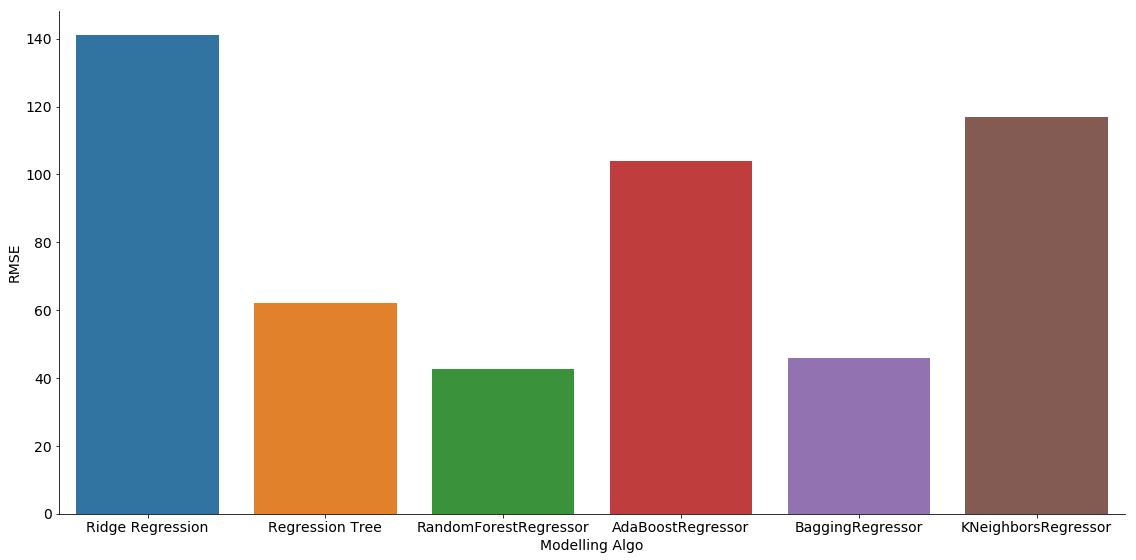

In [32]:
sns.factorplot(x='Modelling Algo',y='RMSE',data=metrics_df,kind='bar',size=8,aspect=2)


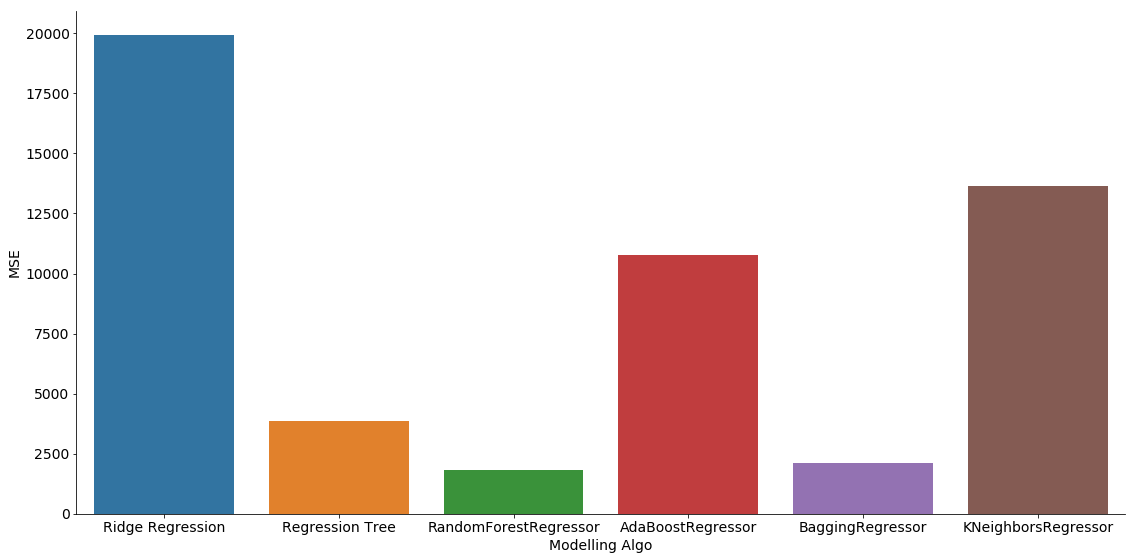

In [33]:
sns.factorplot(x='Modelling Algo',y='MSE',data=metrics_df,kind='bar',size=8,aspect=2)


#### Conclusion

* As the goal is to minimize the three metrics then according to the table the Random Forest Regressor algorithm returns the least error.
* RANDOM FORETS REGRESSOR gives the least RMSE. Hence, we choose it to make predictions.


### Optimal model. Random forest Regressor


In [34]:
forest_model = RandomForestRegressor(n_estimators = 400, criterion='mse',random_state=1, n_jobs=-1)
forest_model.fit(X_train, y_train)
y_test_pred = forest_model.predict(X_test)

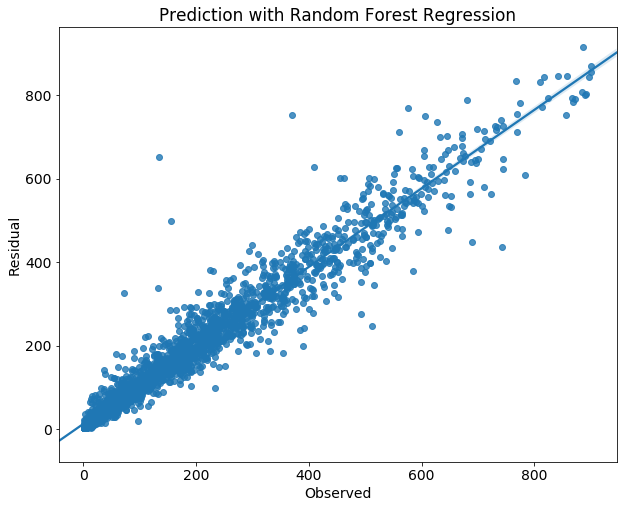

In [35]:
sns.regplot(y_test,y_test_pred)
plt.title('Prediction with Random Forest Regression')
plt.xlabel('Observed')
plt.ylabel('Residual')
plt.show()
